# blender_utils

参考: [zju3dv/pvnet-rendering](https://github.com/zju3dv/pvnet-rendering/blob/master/base_utils.py)

In [5]:
import os
import sys
sys.path.append('..')
sys.path.append('../../')

import numpy as np

from src.config.config import cfg
from src.datasets.LineMod.LineModDB import LineModDB
from src.utils.base_utils import read_ply_model

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## Setup

In [7]:
pvnet_linemod_dir = cfg.PVNET_LINEMOD_DIR
linemod_dir = cfg.LINEMOD_DIR
obj_name = 'ape'

## 1. ModelAligner Test

In [8]:
from blender_utils import ModelAligner

ModuleNotFoundError: No module named 'blender_utils'

### インスタンス生成

In [5]:
aligner = ModelAligner(obj_name=obj_name,
                                                pvnet_linemod_dir=pvnet_linemod_dir,
                                                linemod_dir=linemod_dir)

### 1.1. get_translation_transform Test

In [6]:
translation_transform = aligner.get_translation_transform()

print('translation_transform type')
print(type(translation_transform))
print('translation_transform =')
print(translation_transform)

translation_transform type
<class 'numpy.ndarray'>
translation_transform =
[ 0.00642697  0.00273947 -0.0337945 ]


## 2. PoseTransformer

In [7]:
from blender_utils import PoseTransformer

### 2.1. インスタンス生成

In [8]:
pose_transformer = PoseTransformer(linemod_dir,
                                                                               pvnet_linemod_dir,
                                                                               obj_name)

### 2.2. orig_pose_to_blender_pose Test

In [9]:
from src.datasets.LineMod.LineModDB import read_pose

In [10]:
img_num = 0
rt_dir = os.path.join(linemod_dir,
                                          obj_name,
                                          'data')
pose = read_pose(os.path.join(rt_dir, 'rot{}.rot'.format(img_num)),
                                      os.path.join(rt_dir, 'tra{}.tra'.format(img_num)))
print('pose =', pose)

RT = pose_transformer.orig_pose_to_blender_pose(pose).astype(np.float32)
print('RT =', RT)
#print(RT)

pose = [[-0.0963063  0.994044  -0.0510079 -0.111814 ]
 [-0.573321  -0.0135081  0.81922   -0.0783622]
 [ 0.813651   0.10814    0.571207   1.03612  ]]
RT = [[-0.0963063  -0.994044    0.0510079  -0.10798602]
 [-0.573321    0.0135081  -0.81922    -0.10976905]
 [ 0.813651   -0.10814    -0.571207    1.0223418 ]]


### 2.3. blender_pose_to_blender_euler Test

In [29]:
from transforms3d.euler import mat2euler

pose = np.array([[1., 0., 0.],
                                    [0., -1., 0.],
                                    [0., 0., -1.]])

In [30]:
euler = mat2euler(pose)
euler = np.array(euler)
print(euler)

[ 3.14159265 -0.          0.        ]


In [31]:
euler = mat2euler(pose, axes='szxz')
euler = np.array(euler)
print(euler)

[-0.          3.14159265  0.        ]


In [39]:
pose = np.array([[1., 0., 0.],
                                    [0., 1., 0.],
                                    [0., 0., 1.]])

euler = mat2euler(pose, axes='szxz')
euler = np.array(euler)
print(euler)

[-3.14159265  0.          0.        ]


### 2.4. orig_pose_to_blender_euler Test

In [15]:
img_num = 0
rt_dir = os.path.join(linemod_dir,
                                          obj_name,
                                          'data')
pose = read_pose(os.path.join(rt_dir, 'rot{}.rot'.format(img_num)),
                                      os.path.join(rt_dir, 'tra{}.tra'.format(img_num)))
print('pose =', pose)

euler = pose_transformer.orig_pose_to_blender_euler(pose)
print('euler =', euler)

pose = [[-0.0963063  0.994044  -0.0510079 -0.111814 ]
 [-0.573321  -0.0135081  0.81922   -0.0783622]
 [ 0.813651   0.10814    0.571207   1.03612  ]]
euler = [172.42935241  34.83444354   3.56286401]


## 3. DataStatistics

In [16]:
from blender_utils import DataStatistics

### 3.1. インスタンス生成

In [17]:
ds = DataStatistics(linemod_dir,
                                        pvnet_linemod_dir,
                                        obj_name)

config.json ファイルが見つかりません．デフォルト値を使用します．


### 3.2. get_proper_crop_size Test

In [18]:
ds.get_proper_crop_size()

min width: 34 px, max width: 67 px
min height: 35 px, max height: 88 px


### 3.3. get_dataset_poses Test

In [19]:
dataset_poses = ds.get_dataset_poses()
print(dataset_poses)

564e+01],
       [ 1.39721150e+02,  6.19129526e+01, -8.24066864e+00],
       [ 1.93976670e+02,  3.04950672e+01,  5.94032057e+00],
       [ 1.77628589e+02,  7.05363699e+01, -3.25595225e+00],
       [ 1.53939457e+02,  2.16742459e+01,  2.23051380e+00],
       [ 1.88599124e+02,  2.39967545e+01,  2.60524736e+01],
       [ 1.24375696e+02,  7.90749389e+01,  1.31242775e+01],
       [ 1.29641098e+02,  6.72723548e+01,  1.28412421e+01],
       [ 1.34808994e+02,  8.25278259e+01,  5.72012670e+01],
       [ 1.61271685e+02,  3.28520104e+01,  3.94277521e+00],
       [ 1.66912902e+02,  2.21179766e+01, -1.11687368e+00],
       [ 1.86959300e+02,  3.72186818e+01, -2.84261002e+01],
       [ 1.76504026e+02,  2.27619942e+01,  2.51356232e+01],
       [ 1.40310413e+02,  4.95521940e+01,  3.75338601e+00],
       [ 1.08446498e+02,  5.91346365e+01,  1.25856573e+01],
       [ 1.39733159e+02,  2.58428841e+01,  2.29344839e+00],
       [ 1.87408333e+02,  1.99111273e+01,  1.46850153e+01],
       [ 1.89063731e+02,  3.76

# sample sphere

これは実用上非常に重要な問題です。 例えば、地球上の陸地の総面積を測りたいとします。 地球の表面にn個の点を「一様に」取ることができれば、陸地に落ちている点mの数を単純に数えれば、陸地の面積が地球の全表面積の約m/nであることがわかります。 なお、ある緯度・経度間隔で緯度線と経度線の交点を取ることはできません。このようにして取った点は一様ではなく、下の図のように赤道に比べて極付近の点が密集しているからです。

この問題を厳密に解決するためには、まず、直感的に感じられる「一様性」を数学的に定義する必要があります。 これを定義する一つの方法は、ポイント間の距離の最小値を最大化することです。 このように定義された問題はTammes問題と呼ばれ、Packing問題の特別なケースとなっています。 残念ながら、梱包の問題にはエレガントな解決策がないことが多いのです。 問題を定義する別の方法として、点を同じ電荷と考え、システム全体の位置エネルギーが最小になるようにします。 この問題は、電荷の動きをシミュレーションすることで解決できますが、計算量が非常に多く、数値解しか得られません。

$$
z_n = (2n-1)/N-1 \\
x_n = \sqrt{1-z_n^2} \cdot \cos({2\pi n \phi}) \\
y_n = \sqrt{1-z_n^2} \cdot \sin({2\pi n \phi})
$$

ここで、定数 $\phi = (\sqrt{5-1}) / 2 \approx 0.618$ はまさに黄金比である。

いくつか検索した結果、StackOverflowで驚きの近似解を見つけました：Evenly distributing n points on a sphere.This solution gives the coordinate of each point using a few simple formula. 球の半径を1とし、全部でN個の点を取るとすると、n番目の点の座標［Eq.］は次のように与えられる。

この計算式で1000点を生成した場合の効果は次のようになり、意外にも「均一性」という期待に応えることができました。

式(1~3)は、「フィボナッチ格子」（またはフィボナッチグリッド）と呼ばれるドットマトリックスを生成します。 フィボナッチグリッドと呼ばれる理由については、「黄金比もフィボナッチ数列に現れる」ということで簡単に説明できますし、以下のようにフィボナッチ数の登場も見られます。 この記事（Measuring of the area on a sphere using Fibonacci and latitud-longitude lattices）では、フィボナッチ格子を使って球上の不規則な図形の面積を測定することが、子午線格子( と重み付けされている）を使用した場合と比較して、子午線グリッドを使用した場合には40％の誤差を減らすことができます。

上の図のドットの分布をよく見てみると、実はいくつかの特徴があります。

1. 均一：マクロ的に見て、ドットの密度がどこでも同じようになっている。
2. 密：ドットの間隔を狭めずに、より多くのドットを収容するために、ドットの間に大きな隙間がない。
3. カオス：ドットの配列にはパターンがあるように見えるが、そのパターンが何であるかを正確に言うことはできない。

私たちが「ユニフォーム」と呼ぶのは、この3つの特性を意味しています。

式(1~3)は、$\phi$ の値に非常に敏感です。 黄金比から少しでもずれると、悪い結果になります。 例えば、次の3つのプロットは、$\phi$ がそれぞれ0.616、0.617、0.619の場合に得られるドットマトリックスです。 ご覧のように、$\phi=0.617$ のドットパターンは、極では渦巻き、赤道付近では縞模様になっており、「混沌」を満たしていませんが、左右の図のドットは、渦巻きや縞模様になっているだけでなく、間隔も広く、「密」も満たしていません。

当然のことながら、「なぜ式(1~3)がうまくいくのか」という疑問があります。 まずは、実際にどのような機能があるのかを見ていきましょう。

In [20]:
num_samples = 1000
azimuths, elevations= ds.sample_sphere(num_samples)
print(elevations)

[0.00000000e+00 5.72957891e-02 1.14591635e-01 1.71887596e-01
 2.29183729e-01 2.86480091e-01 3.43776740e-01 4.01073732e-01
 4.58371125e-01 5.15668977e-01 5.72967345e-01 6.30266285e-01
 6.87565856e-01 7.44866115e-01 8.02167119e-01 8.59468925e-01
 9.16771591e-01 9.74075174e-01 1.03137973e+00 1.08868532e+00
 1.14599200e+00 1.20329982e+00 1.26060885e+00 1.31791914e+00
 1.37523075e+00 1.43254374e+00 1.48985816e+00 1.54717407e+00
 1.60449153e+00 1.66181059e+00 1.71913132e+00 1.77645377e+00
 1.83377800e+00 1.89110407e+00 1.94843202e+00 2.00576193e+00
 2.06309385e+00 2.12042784e+00 2.17776395e+00 2.23510224e+00
 2.29244278e+00 2.34978561e+00 2.40713079e+00 2.46447839e+00
 2.52182846e+00 2.57918105e+00 2.63653623e+00 2.69389406e+00
 2.75125459e+00 2.80861788e+00 2.86598398e+00 2.92335296e+00
 2.98072488e+00 3.03809978e+00 3.09547774e+00 3.15285880e+00
 3.21024303e+00 3.26763049e+00 3.32502122e+00 3.38241529e+00
 3.43981277e+00 3.49721370e+00 3.55461814e+00 3.61202616e+00
 3.66943780e+00 3.726853

### sample_poses Test

In [21]:
sampe_poses = ds.sample_poses()
print(sampe_poses)

[[ 6.49223595e+01  0.00000000e+00  3.02925268e+01  1.56099058e-01
  -3.78160025e-02  1.07064992e+00]
 [ 2.87414595e+02  5.73917048e+00 -1.33823410e+01  2.70066156e-01
   1.05109662e-01  1.07259854e+00]
 [ 1.49906831e+02  1.15369590e+01 -2.55529916e+01 -2.87879122e-02
   3.50321681e-02  7.81350758e-01]
 [ 1.23990673e+01  1.74576031e+01  3.38119109e+01 -6.61370162e-02
   4.20891438e-02  9.64876479e-01]
 [ 2.34891303e+02  2.35781785e+01  2.17217272e+01 -7.82260414e-02
   6.42462723e-02  1.00965881e+00]
 [ 9.73835392e+01  3.00000000e+01  1.17394775e+01 -2.94161662e-02
  -4.12881597e-02  7.51955505e-01]
 [ 3.19875775e+02  3.68698976e+01  2.42315730e+01 -1.43122226e-01
  -5.02917144e-02  7.65542987e-01]
 [ 1.82368011e+02  4.44270040e+01  7.73241772e+00 -4.66980075e-02
   9.55737198e-02  1.11518721e+00]
 [ 4.48602471e+01  5.31301024e+01 -5.30697136e+00 -1.12616199e-01
   2.28045694e-02  7.90352114e-01]
 [ 2.67352483e+02  6.41580672e+01 -3.00503295e+00  2.42667663e-02
   1.29476481e-01  1.0891

In [43]:
from scipy import stats

In [45]:
blender_pose_dir_path = os.path.join(cfg.DATA_DIR, 'blender_poses')
blender_poses_path = os.path.join(blender_pose_dir_path, '{}_poses.npy'.format(obj_name))

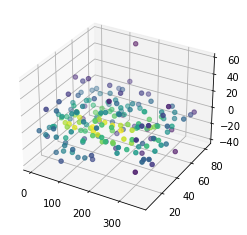

"\nplt.plot(ls, euler_sampler(ls), label='data')\n\nplt.xlim([eulers_min, eulers_max])\nplt.legend()\nplt.show()\n"

In [69]:
#def sample_poses(num_samples):
eulers, translations = ds.get_dataset_poses()
num_samples = num_samples
azimuths, elevations = ds.sample_sphere(num_samples)

euler_sampler = stats.gaussian_kde(eulers.T)
density = euler_sampler(eulers.T)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
x, y, z = eulers[:, 0], eulers[:, 1], eulers[:, 2]
ax.scatter(x, y, z, c=density)
plt.show()

"""
plt.plot(ls, euler_sampler(ls), label='data')

plt.xlim([eulers_min, eulers_max])
plt.legend()
plt.show()
"""

In [47]:
eulers = euler_sampler.resample(num_samples).T
eulers[:, 0] = azimuths
eulers[:, 1] = elevations
translation_sampler = stats.gaussian_kde(translations.T)
translations = translation_sampler.resample(num_samples).T
#np.save(blender_poses_path, np.concatenate([eulers, translations], axis=-1))
#return np.concatenate([eulers, translations], axis=-1)